# Data Science Aplicada à Área de Saúde

## Mini-Projeto 2 - Manipulação de Dados Para Previsão de Ocorrência de Hepatite

### Prática de tratar o dataset

A hepatite é a inflamação do fígado. Pode ser causada por vírus ou pelo uso de alguns remédios, álcool e outras drogas, assim como por doenças autoimunes, metabólicas e genéticas. Em alguns casos, são doenças silenciosas que nem sempre apresentam sintomas.

As hepatites virais são inflamações causadas por vírus que são classificados por letras do alfabeto em A, B, C, D (Delta) e E. No Brasil, mais de 70% (23.070) dos óbitos por hepatites virais são decorrentes da Hepatite C, seguido da Hepatite B (21,8%) e A (1,7%). O país registrou 40.198 casos novos de hepatites virais em 2017.  

Neste Mini-Projeto seu trabalho é manipular o conjunto de dados e deixá-lo pronto para a etapa de modelagem preditiva, para construção de um modelo capaz de fazer previsões com dados de novos pacientes e se eles podem ou não desenvolver Hepatite. Abaixo o conjunto de dados (mas que está sendo fornecido a você).



https://archive.ics.uci.edu/ml/datasets/hepatitis

###### Dicionário dos termos 

Class - Se o paciente está vivo ou não

Age - Idade do Paciênte

Gender - Genêro do Paciênte

Steroid - Se o paciente faz uso o de esterôides 

Antivirals - Se o paciente faz uso de antivirais

Fatígue - Se o paciente sofre ou não com fádiga (hepatite C pode causar)

Malaise - Se o paciente sente mal estar

Anorexia - Se o paciente está ou não anorexo

LiverBig - Se o paciente teve aumento ou não do figado

LiverFirm - Se o figado do paciente está firme ou não

SpleenPalpable - Se o paciente possui problemas para dormir

Spiders - Se o paciente demonstrou angiomas aranha ou não (Os angiomas de aranha consistem em pequenos 
pontos de tom vermelho-vivo, formados por um vaso sanguíneo central dilatado, que se assemelham a pata de uma aranha)

Ascites - Se o paciente possui ascite (acúmulo de líquido (ascítico) que contém proteínas dentro do abdômen)

Varices - Se o paciente demonstrou possuir variz

Bilírubin - quantidade de Bilirrubina encontrada na bile 

AlkPhosphate - Quantidade de fosfato alcalino encontrado no sangue

SGOT - Quantidade de SGOT(transaminase glutâmico oxalacética) encontrado no sangue

Albumin - Quantidade de albomina encontrado no sangue

Protime - Quanto tempo o sangue leva para formar um coagulo, medição feita em segundo

Histology - Se a doença desenvolveu carater auto-imune

### Carregando os Dados

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
nome_colunas = ['Class', 'Age','Gender', 'Steroid', 'Antivirals','Fatigue','Malaise','Anorexia','LiverBig',
                'LiverFirm','SpleenPalpable','Spiders','Ascites','Varices','Bilirubin','AlkPhosphate','SGOT',
                'Albumin','Protime','Histology']

In [3]:
dados_hepatite = pd.read_csv('dados/dataset-data-munging-02-hepatite.data', 
                             names = nome_colunas, 
                             sep = ',', 
                             encoding = 'latin-1')

In [4]:
dados_hepatite.head(20)

,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
6,1,51,1,1,2,1,2,1,2,2,1,1,2,2,?,?,?,?,?,1
7,2,23,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,?,?,?,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.70,?,48,4.4,?,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,120,3.9,?,1


In [5]:
# informações do dataset
dados_hepatite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class           155 non-null    int64 
 1   Age             155 non-null    int64 
 2   Gender          155 non-null    int64 
 3   Steroid         155 non-null    object
 4   Antivirals      155 non-null    int64 
 5   Fatigue         155 non-null    object
 6   Malaise         155 non-null    object
 7   Anorexia        155 non-null    object
 8   LiverBig        155 non-null    object
 9   LiverFirm       155 non-null    object
 10  SpleenPalpable  155 non-null    object
 11  Spiders         155 non-null    object
 12  Ascites         155 non-null    object
 13  Varices         155 non-null    object
 14  Bilirubin       155 non-null    object
 15  AlkPhosphate    155 non-null    object
 16  SGOT            155 non-null    object
 17  Albumin         155 non-null    object
 18  Protime   

In [6]:
# tamano do dataset
dados_hepatite.shape

(155, 20)

In [7]:
# Vendo as informações do dataset
dados_hepatite.describe()

,Class,Age,Gender,Antivirals,Histology
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.845161,1.451613
std,0.406070,12.565878,0.305240,0.362923,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000
25%,2.000000,32.000000,1.000000,2.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000


In [8]:
# Dados categóricos
dfcatname = ['Gender']
dfcatname

['Gender']

In [9]:
# Dados numéricos continúos
dfconname = [item for item in list(dados_hepatite.columns) if item not in list(dfcatname)]
dfconname

['Class',
 'Age',
 'Steroid',
 'Antivirals',
 'Fatigue',
 'Malaise',
 'Anorexia',
 'LiverBig',
 'LiverFirm',
 'SpleenPalpable',
 'Spiders',
 'Ascites',
 'Varices',
 'Bilirubin',
 'AlkPhosphate',
 'SGOT',
 'Albumin',
 'Protime',
 'Histology']

In [10]:
# Como deu para notar na info e no describe, a maioria dos dados continuos numéricos vão precisar mudar de 
# tipo, porém antes lidar com os dados missing que estão representados com ?

missing_columns = []

for item in list(dados_hepatite.columns):
    if '?' in dados_hepatite[item].unique():
        missing_columns.append(item)
print(missing_columns)

['Steroid', 'Fatigue', 'Malaise', 'Anorexia', 'LiverBig', 'LiverFirm', 'SpleenPalpable', 'Spiders', 'Ascites', 'Varices', 'Bilirubin', 'AlkPhosphate', 'SGOT', 'Albumin', 'Protime']


C:\Users\angel\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys


In [11]:
# Observar quantos dados missing temos em cada categoria
for item in missing_columns:
    print('{}: {}\n'.format(item, np.where(dados_hepatite[item] == '?')[0].size))

Steroid: 1

Fatigue: 1

Malaise: 1

Anorexia: 1

LiverBig: 10

LiverFirm: 11

SpleenPalpable: 5

Spiders: 5

Ascites: 5

Varices: 5

Bilirubin: 6

AlkPhosphate: 29

SGOT: 4

Albumin: 16

Protime: 67



Percebemos que existem muitos registros com dados faltantes e devido ao tamanho pequeno do dataset não é uma boa escolha os retirar, neste caso foi escolhido tomar duas abordagens, para os dados que se baseiam apenas em sim ou não, criar uma terceira categoria para desconhecido e para os dados que são medições como SGOT, Albumin e Protime utilizar a mediana ou o valor médio, uma vez que é impossivel existir valores nulos estas categorias e não seria uma decisão expertar adicionar um valor aleatório, aproveitando a existência deste tratamento irei verificar a existência de outliers antes.

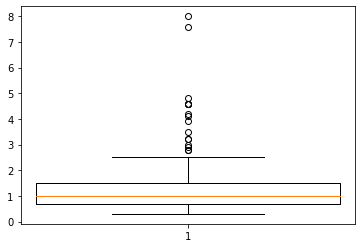

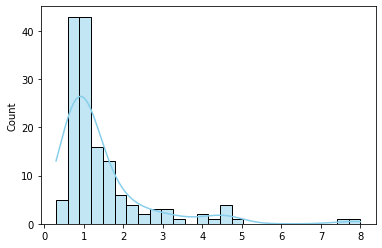

In [12]:
# Verificando a existência de outliers na coluna Bilirubin
Bilirubin_number = []

for item in dados_hepatite['Bilirubin']:
    if item != '?':
        Bilirubin_number.append(float(item))

plt.boxplot(x=Bilirubin_number, widths=30)
plt.show()

sns.histplot(data=Bilirubin_number, color="skyblue", kde=True)
plt.show()


Os valores mostrados de bilirrubina estão dentro do esperado com a maior parte dos pacientes apresentando o valor normal de 0,2 a 1,1 mg/dL, porém um paciente acabou apresentando 8mg/dL sendo um tipo de outlier, este é um valor realmente possivel e por conta do mesmo decidi o manter, mas estarei utilizando a mediana para preencher os valores missing evitando assim a interferencia deste caso especial.

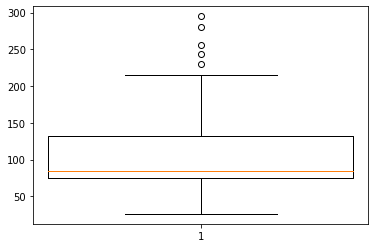

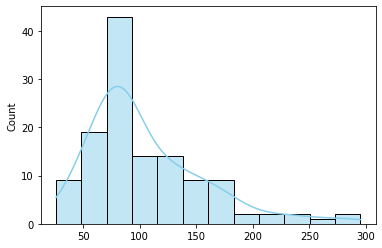

In [13]:
# Verificando a existência de outliers na coluna AlkPhosphate
AlkPhosphate_number = []

for item in dados_hepatite['AlkPhosphate']:
    if item != '?':
        AlkPhosphate_number.append(float(item))

plt.boxplot(x=AlkPhosphate_number, widths=30)
plt.show()

sns.histplot(data=AlkPhosphate_number, color="skyblue", kde=True)
plt.show()


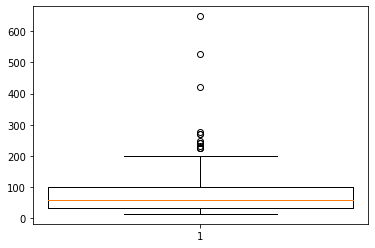

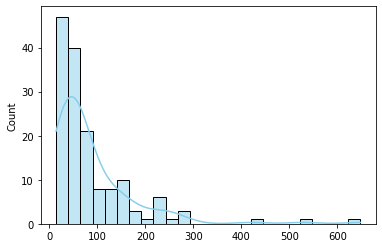

In [14]:
# Verificando a existência de outliers na coluna SGOT
SGOT_number = []

for item in dados_hepatite['SGOT']:
    if item != '?':
        SGOT_number.append(float(item))

plt.boxplot(x=SGOT_number, widths=30)
plt.show()

sns.histplot(data=SGOT_number, color="skyblue", kde=True)
plt.show()

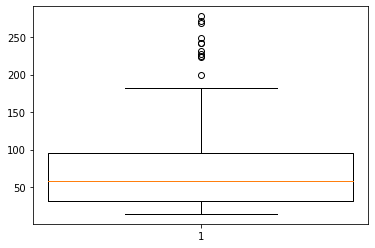

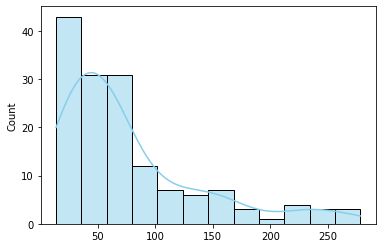

In [15]:
# Os registro de SGOT demonstraram outliers também, ao contrario do de bilirrubina não consegui encontrar
# fontes que indicassem ser exceções plausiveis, devido a isso decidi os regular colocando o valor da 
# mediana e completando os valores missing com a média.

for i in range(len(SGOT_number)):
    if SGOT_number[i] >= 400:
        SGOT_number[i] = np.median(SGOT_number)

# Verificando se os registros estão normalizados agora

plt.boxplot(x=SGOT_number, widths=30)
plt.show()

sns.histplot(data=SGOT_number, color="skyblue", kde=True)
plt.show()

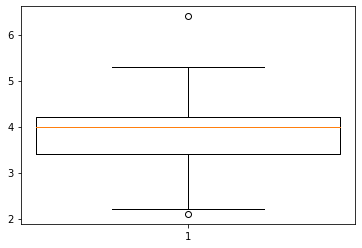

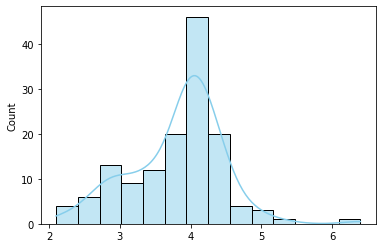

In [16]:
# Verificando a existência de outliers na coluna Albumin
Albumin_number = []

for item in dados_hepatite['Albumin']:
    if item != '?':
        Albumin_number.append(float(item))

plt.boxplot(x=Albumin_number, widths=30)
plt.show()

sns.histplot(data=Albumin_number, color="skyblue", kde=True)
plt.show()

Os registros de albumina demonstraram um único valor acima do comum, mas o mesmo não está sendo discrepante em relação aos outros, pela pesquisa feita o valor normal de albumina fica em torno de 3,4 a 5,4 g/dL, enquanto valores abaixo disso normalmente ocorrem por doenças como a hepatite e este valor acima pode ser atribuido à desidratação, que pode ser causada por diarreia, pouca injestão de água ou outros meios de perda de liquido.

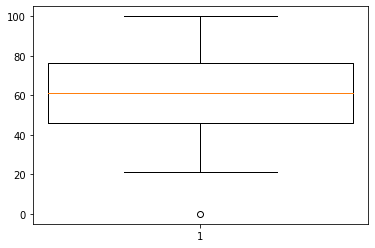

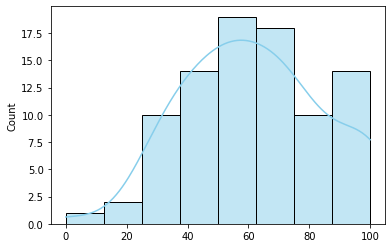

In [17]:
# Verificando a existência de outliers na coluna Protime
Protime_number = []

for item in dados_hepatite['Protime']:
    if item != '?':
        Protime_number.append(float(item))

plt.boxplot(x=Protime_number, widths=30)
plt.show()

sns.histplot(data=Protime_number, color="skyblue", kde=True)
plt.show()


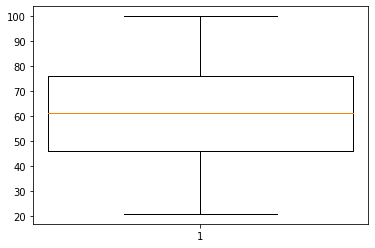

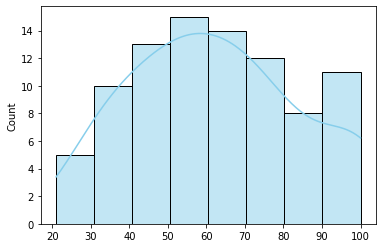

In [18]:
# Entre os registros do Prototime existem alguns que estão errados, que são os abaixo de 20, protime é
# a medição do tempo de coagulação do sangue, portanto é impossivel de que seja 0, dado isso irei 
# fazer a mesma normalização que foi feita no SGOT

for i in range(len(Protime_number)):
    if Protime_number[i] < 20:
        Protime_number[i] = np.median(Protime_number)

# Verificando se os registros estão normalizados agora

plt.boxplot(x=Protime_number, widths=30)
plt.show()

sns.histplot(data=Protime_number, color="skyblue", kde=True)
plt.show()

In [19]:
# Criando um novo dataframe para os dados tratados

dados_tratados = pd.DataFrame(dados_hepatite['Age'], columns=['Age'])
dados_tratados['Gender'] = dados_hepatite['Gender']
dados_tratados.head()

,Age,Gender
0,30,2
1,50,1
2,78,1
3,31,1
4,34,1


In [20]:
# Convertendo os valores missing para todas as colunas de sim ou não
# Aqui vai ser usada a moda de cada coluna por conta da probabilidade ser maior do resultado estar correto

import statistics

variavel = ['Class','Age', 'Gender', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'LiverBig', 
            'LiverFirm', 'SpleenPalpable', 'Spiders', 'Ascites', 'Varices', 'Histology']
v = -1

for item in variavel: # ler todas as colunas de sim ou não missing do dataset
    n = -1
    auxiliar = []
    auxiliar2 = []
    for i in range(len(dados_hepatite[item])): # ler todos os dados do dataset e os guardar na lista 
        if dados_hepatite[item][i] != '?':     # com exceção dos dados missing
            auxiliar.append(int(dados_hepatite[item][i]))
    for i in range(len(dados_hepatite[item])): # ler novamente todos os dados, mas colocando a moda no
        if dados_hepatite[item][i] != '?':     # no lugar dos missing
            auxiliar2.append(auxiliar[n])
            n = n + 1
        else:
            auxiliar2.append(int(statistics.mode(auxiliar)))
    dados_tratados[item] = auxiliar2           # adicionando a coluna com todos os dados já tratados
        

In [21]:
# Convertendo os valores missing para todas as colunas de medição 
t = 0
v = -1
variavel = [Bilirubin_number, AlkPhosphate_number, SGOT_number, Albumin_number, Protime_number]
missing_mediation = ['Bilirubin', 'AlkPhosphate', 'SGOT','Albumin', 'Protime']

for item in missing_mediation:
    auxiliar = []
    n = -1
    v = v + 1
    mediana = float(np.median(variavel[v]))
    for i in range(len(dados_hepatite[item])):
        if dados_hepatite[item][i] != '?':
            auxiliar.append(float(variavel[v][n]))
            n = n + 1
        else:
            auxiliar.append(mediana)
    dados_tratados[item] = auxiliar
    
dados_tratados.head(10)
            

,Age,Gender,Class,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Histology,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime
0,43,1,1,2,2,1,2,2,2,2,1,1,1,2,2,1.2,100.0,19.0,3.1,61.5
1,30,2,2,1,2,2,2,2,1,2,2,2,2,2,1,1.0,85.0,18.0,4.0,61.5
2,50,1,2,1,2,1,2,2,1,2,2,2,2,2,1,0.9,135.0,42.0,3.5,61.5
3,78,1,2,2,2,1,2,2,2,2,2,2,2,2,1,0.7,96.0,32.0,4.0,42.0
4,31,1,2,2,1,2,2,2,2,2,2,2,2,2,1,0.7,85.0,52.0,4.0,61.5
5,34,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1.0,46.0,200.0,4.0,80.0
6,34,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1.0,85.0,58.0,4.0,61.5
7,51,1,1,1,2,1,2,1,2,2,1,1,2,2,1,0.9,85.0,58.0,4.0,61.5
8,23,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1.0,85.0,28.0,4.0,61.5
9,39,1,2,2,2,1,2,2,2,1,2,2,2,2,1,0.7,85.0,48.0,4.4,61.5


In [22]:
# comparar com os registros originais, para ver se nada foi perdido

dados_hepatite.head(10)

,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
6,1,51,1,1,2,1,2,1,2,2,1,1,2,2,?,?,?,?,?,1
7,2,23,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,?,?,?,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.70,?,48,4.4,?,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,120,3.9,?,1


In [23]:
# Pode se observar que os registros não foram perdidos, mas o último registro acabou ficando em primeiro 
# nota-se isso ao comparar os 10 primeiros e os 10 últimos do dataset original e do criado

print('Original')
dados_hepatite.tail(10)

Original


,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
145,2,31,1,1,2,1,2,2,2,2,2,2,2,2,1.20,75,173,4.2,54,2
146,1,41,1,2,2,1,2,2,2,1,1,1,2,1,4.20,65,120,3.4,?,2
147,1,70,1,1,2,1,1,1,?,?,?,?,?,?,1.70,109,528,2.8,35,2
148,2,20,1,1,2,2,2,2,2,?,2,2,2,2,0.90,89,152,4.0,?,2
149,2,36,1,2,2,2,2,2,2,2,2,2,2,2,0.60,120,30,4.0,?,2
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2
154,1,43,1,2,2,1,2,2,2,2,1,1,1,2,1.20,100,19,3.1,42,2


In [24]:
print('Novo')
dados_tratados.tail(10)

Novo


,Age,Gender,Class,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Histology,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime
145,45,1,1,2,2,1,1,1,2,2,2,1,1,2,2,1.9,85.0,114.0,2.4,35.0
146,31,1,2,1,2,1,2,2,2,2,2,2,2,2,2,1.2,75.0,173.0,4.2,61.5
147,41,1,1,2,2,1,2,2,2,2,2,2,2,2,2,4.2,65.0,120.0,3.4,54.0
148,70,1,1,1,2,1,1,1,2,2,1,1,2,1,2,1.7,109.0,58.0,2.8,61.5
149,20,1,2,1,2,2,2,2,2,1,2,2,2,2,2,0.9,89.0,152.0,4.0,61.5
150,36,1,2,2,2,2,2,2,2,2,2,2,2,2,2,0.6,85.0,30.0,4.0,35.0
151,46,1,1,2,2,1,1,1,2,2,2,1,1,1,2,7.6,120.0,242.0,3.3,61.5
152,44,1,2,2,2,1,2,2,2,1,2,2,2,2,2,0.9,126.0,142.0,4.3,61.5
153,61,1,2,1,2,1,1,2,1,1,2,1,2,2,2,0.8,75.0,20.0,4.1,50.0
154,53,2,2,1,2,1,2,2,2,2,1,1,2,1,2,1.5,81.0,19.0,4.1,48.0


In [25]:
# Ver as informações do novo dataset
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             155 non-null    int64  
 1   Gender          155 non-null    int64  
 2   Class           155 non-null    int64  
 3   Steroid         155 non-null    int64  
 4   Antivirals      155 non-null    int64  
 5   Fatigue         155 non-null    int64  
 6   Malaise         155 non-null    int64  
 7   Anorexia        155 non-null    int64  
 8   LiverBig        155 non-null    int64  
 9   LiverFirm       155 non-null    int64  
 10  SpleenPalpable  155 non-null    int64  
 11  Spiders         155 non-null    int64  
 12  Ascites         155 non-null    int64  
 13  Varices         155 non-null    int64  
 14  Histology       155 non-null    int64  
 15  Bilirubin       155 non-null    float64
 16  AlkPhosphate    155 non-null    float64
 17  SGOT            155 non-null    flo

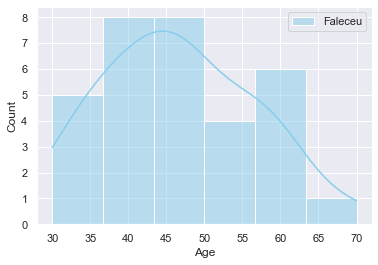

In [26]:
# Comparação entre as faixas de idade que mais foram mortos por hepatite
sns.set(style="darkgrid")

sns.histplot(data=dados_tratados[(dados_tratados['Class'] == 1)], x="Age", color="skyblue", label="Faleceu", kde=True)

plt.legend() 
plt.show()

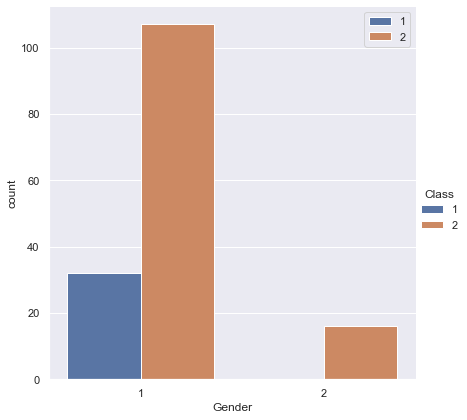

In [27]:
# Comparação entre os gêneros e os que mais morreram com hepatite
sns.set(style="darkgrid")
sns.catplot(x = 'Gender', hue = 'Class', data = dados_tratados, kind = 'count', height = 6)

plt.legend() 
plt.show()

### Forma como o professor do curso tratou os dados

In [28]:
dados_hepatite = pd.read_csv('dados/dataset-data-munging-02-hepatite.data', 
                             names = nome_colunas, 
                             sep = ',', 
                             encoding = 'latin-1')

In [29]:
# Replace ? com valores NA
dados_hepatite.replace('?', np.nan, inplace = True)

In [30]:
# Visualiza as 20 primeiras linhas
dados_hepatite.head(20)

,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,NaN,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,NaN,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,NaN,1
3,2,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,NaN,200,4.0,NaN,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
6,1,51,1,1,2,1,2,1,2,2,1,1,2,2,NaN,NaN,NaN,NaN,NaN,1
7,2,23,1,2,2,2,2,2,2,2,2,2,2,2,1.00,NaN,NaN,NaN,NaN,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.70,NaN,48,4.4,NaN,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.00,NaN,120,3.9,NaN,1


In [31]:
dados_hepatite.count()

Class             155
Age               155
Gender            155
Steroid           154
Antivirals        155
Fatigue           154
Malaise           154
Anorexia          154
LiverBig          145
LiverFirm         144
SpleenPalpable    150
Spiders           150
Ascites           150
Varices           150
Bilirubin         149
AlkPhosphate      126
SGOT              151
Albumin           139
Protime            88
Histology         155
dtype: int64

In [32]:
dados_hepatite.AlkPhosphate.isnull().values.any()

True

In [33]:
dados_hepatite.AlkPhosphate.isnull().sum()

29

Aplicando o Recurso de Imputação para Tratamento de Valores Missing

In [34]:
# Função para o Replace das linhas vazias
def input_median(series):
    return series.fillna(series.median())

In [35]:
# Aplica a função
dados_hepatite.Steroid = dados_hepatite['Steroid'].transform(input_median)
dados_hepatite.Fatigue = dados_hepatite['Fatigue'].transform(input_median)
dados_hepatite.Malaise = dados_hepatite['Malaise'].transform(input_median)
dados_hepatite.Anorexia = dados_hepatite['Anorexia'].transform(input_median)
dados_hepatite.LiverBig = dados_hepatite['LiverBig'].transform(input_median)
dados_hepatite.LiverFirm = dados_hepatite['LiverFirm'].transform(input_median)
dados_hepatite.SpleenPalpable = dados_hepatite['SpleenPalpable'].transform(input_median)
dados_hepatite.Ascites = dados_hepatite['Ascites'].transform(input_median)
dados_hepatite.Varices = dados_hepatite['Varices'].transform(input_median)
dados_hepatite.Spiders = dados_hepatite['Spiders'].transform(input_median)
dados_hepatite.Bilirubin = dados_hepatite['Bilirubin'].transform(input_median)
dados_hepatite.SGOT = dados_hepatite['SGOT'].transform(input_median)
by_class = dados_hepatite.groupby(['Class'])
dados_hepatite.AlkPhosphate = by_class['AlkPhosphate'].transform(input_median)
by_bill_class = dados_hepatite.groupby(['Class'])
dados_hepatite.Albumin = by_bill_class['Albumin'].transform(input_median)
dados_hepatite.Protime = by_bill_class['Protime'].transform(input_median)

In [36]:
dados_hepatite.count()

Class             155
Age               155
Gender            155
Steroid           155
Antivirals        155
Fatigue           155
Malaise           155
Anorexia          155
LiverBig          155
LiverFirm         155
SpleenPalpable    155
Spiders           155
Ascites           155
Varices           155
Bilirubin         155
AlkPhosphate      155
SGOT              155
Albumin           155
Protime           155
Histology         155
dtype: int64

In [37]:
# Visualiza as primeiras linhas
dados_hepatite.head(20)

,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,66.0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,66.0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,66.0,1
3,2,31,1,2.0,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,85.0,200,4.0,66.0,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
6,1,51,1,1,2,1,2,1,2,2,1,1,2,2,1.0,113.5,58.0,3.3,39.0,1
7,2,23,1,2,2,2,2,2,2,2,2,2,2,2,1.00,85.0,58.0,4.0,66.0,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.70,85.0,48,4.4,66.0,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.00,85.0,120,3.9,66.0,1


In [38]:
# Estatísticas das colunas numéricas
dados_hepatite.describe()

,Class,Age,Gender,Antivirals,Histology
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.845161,1.451613
std,0.406070,12.565878,0.305240,0.362923,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000
25%,2.000000,32.000000,1.000000,2.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000


In [39]:
# Extrai as colunas do tipo object (qualitativas)
cols = dados_hepatite.columns[dados_hepatite.dtypes.eq('object')]

In [40]:
# Converte as colunas para o tipo numérico
dados_hepatite[cols] = dados_hepatite[cols].apply(pd.to_numeric, errors = 'coerce')

In [41]:
# info para o dataset
dados_hepatite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Class           155 non-null    int64  
 1   Age             155 non-null    int64  
 2   Gender          155 non-null    int64  
 3   Steroid         155 non-null    float64
 4   Antivirals      155 non-null    int64  
 5   Fatigue         155 non-null    float64
 6   Malaise         155 non-null    float64
 7   Anorexia        155 non-null    float64
 8   LiverBig        155 non-null    float64
 9   LiverFirm       155 non-null    float64
 10  SpleenPalpable  155 non-null    float64
 11  Spiders         155 non-null    float64
 12  Ascites         155 non-null    float64
 13  Varices         155 non-null    float64
 14  Bilirubin       155 non-null    float64
 15  AlkPhosphate    155 non-null    float64
 16  SGOT            155 non-null    float64
 17  Albumin         155 non-null    flo

In [42]:
# Muda os valores de 1 e 2 para 0 e 1, apenas para facilitar a interpretação
dados_hepatite [['Class', 'Age','Gender', 'Steroid', 'Antivirals','Fatigue','Malaise','Anorexia','LiverBig',
                'LiverFirm','SpleenPalpable','Spiders','Ascites','Varices','Bilirubin','AlkPhosphate','SGOT',
                'Albumin','Protime','Histology']] = dados_hepatite [['Class', 'Age','Gender', 'Steroid', 'Antivirals','Fatigue','Malaise','Anorexia','LiverBig',
                'LiverFirm','SpleenPalpable','Spiders','Ascites','Varices','Bilirubin','AlkPhosphate','SGOT',
                'Albumin','Protime','Histology']].apply(pd.Series.replace, to_replace = 1, value = 0)

dados_hepatite [['Class', 'Age','Gender', 'Steroid', 'Antivirals','Fatigue','Malaise','Anorexia','LiverBig',
                'LiverFirm','SpleenPalpable','Spiders','Ascites','Varices','Bilirubin','AlkPhosphate','SGOT',
                'Albumin','Protime','Histology']] = dados_hepatite [['Class', 'Age','Gender', 'Steroid', 'Antivirals','Fatigue','Malaise','Anorexia','LiverBig',
                'LiverFirm','SpleenPalpable','Spiders','Ascites','Varices','Bilirubin','AlkPhosphate','SGOT',
                'Albumin','Protime','Histology']].apply(pd.Series.replace, to_replace = 2, value = 1)

In [43]:
# Visualiza as primeiras linhas
dados_hepatite.head(20)

,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
0,1,30,1,0.0,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,85.0,18.0,4.0,66.0,0
1,1,50,0,0.0,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.0,42.0,3.5,66.0,0
2,1,78,0,1.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.0,32.0,4.0,66.0,0
3,1,31,0,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.0,52.0,4.0,80.0,0
4,1,34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,85.0,200.0,4.0,66.0,0
5,1,34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,95.0,28.0,4.0,75.0,0
6,0,51,0,0.0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,113.5,58.0,3.3,39.0,0
7,1,23,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,85.0,58.0,4.0,66.0,0
8,1,39,0,1.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.7,85.0,48.0,4.4,66.0,0
9,1,30,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,85.0,120.0,3.9,66.0,0


###### Análise Exploratória

In [44]:
# Checando a proporção por idade
# Criaremos colunas auxiliares para ajudar no trabalho de análise exploratória
dados_hepatite['Idade'] = np.where((dados_hepatite['Age'] < 18), 'Adolescente',
                                np.where((dados_hepatite['Age'] >= 18) & (dados_hepatite['Age'] <= 25), 'Jovem',
                                np.where((dados_hepatite['Age'] >= 25) & (dados_hepatite['Age'] <= 40), 'Adulto',
                                        'Senior')))

In [45]:
dados_hepatite['Idade'].value_counts()

Senior         72
Adulto         68
Jovem          14
Adolescente     1
Name: Idade, dtype: int64

In [46]:
# Proporção por sexo
dados_hepatite['Gender'].value_counts()

0    139
1     16
Name: Gender, dtype: int64

In [47]:
# Proporção por óbito causado pela doença
dados_hepatite['Class'].value_counts()

1    123
0     32
Name: Class, dtype: int64

Criaremos colunas auxiliares para ajudar no trabalho de análise exploratória

In [48]:
# Função para preencer uma nova coluna com o sexo do do paciente
# 0 - Homem e 1 - Mulher
def tipoPessoa_func(gender):
    if gender.values.item() == 0:
        return 'Homem'
    else:
        return 'Mulher'

# Aplica a função
dados_hepatite['Sexo_Pessoa'] = dados_hepatite[['Gender']].apply(tipoPessoa_func, axis = 1)

In [49]:
dados_hepatite.head()

,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,...,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology,Idade,Sexo_Pessoa
0,1,30,1,0.0,1,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,85.0,18.0,4.0,66.0,0,Adulto,Mulher
1,1,50,0,0.0,1,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.9,135.0,42.0,3.5,66.0,0,Senior,Homem
2,1,78,0,1.0,1,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.7,96.0,32.0,4.0,66.0,0,Senior,Homem
3,1,31,0,1.0,0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.7,46.0,52.0,4.0,80.0,0,Adulto,Homem
4,1,34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,85.0,200.0,4.0,66.0,0,Adulto,Homem


In [50]:
# Função para preencer uma nova coluna com o status do paciente
# 0 - Faleceu e 2 - Não Faleceu
def tipoPessoa_func(live):
    if live.values.item() == 0:
        return 'Faleceu'
    else:
        return 'Não Faleceu'

# Aplica a função
dados_hepatite['Status_paciente'] = dados_hepatite[['Class']].apply(tipoPessoa_func, axis = 1)

Text(0.5, 1.0, 'Pacientes Por Sexo')

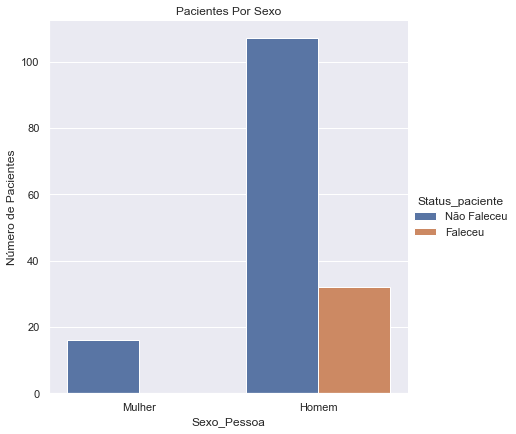

In [51]:
# Como o número de doente é afetado pelo sexo da pessoa
mx = sns.catplot(x = 'Sexo_Pessoa', hue = 'Status_paciente', data = dados_hepatite, kind = 'count', height = 6)
mx.set(ylabel = 'Número de Pacientes')
plt.title('Pacientes Por Sexo')

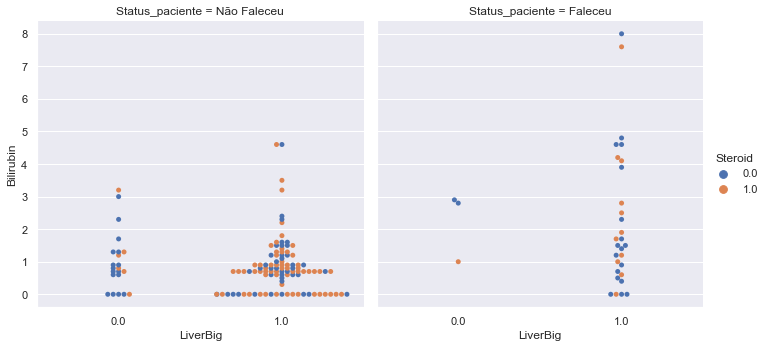

In [52]:
# Se a bilirrubina é alta e o fígado é grande, há menos chances de sobrevivência
gráfico = sns.catplot(x = 'LiverBig',
                      y = 'Bilirubin',
                      hue = 'Steroid',
                      col = 'Status_paciente',
                      data = dados_hepatite,
                      kind = 'swarm')

<AxesSubplot:>

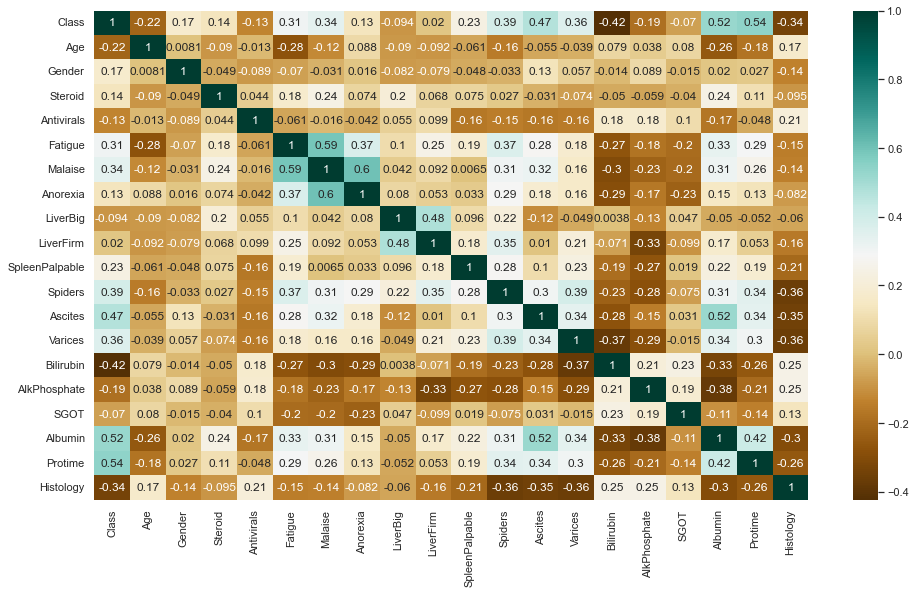

In [53]:
# Correlação entre as variáveis
plt.figure(figsize = (16,9))
sns.heatmap(dados_hepatite.corr(), cmap = 'BrBG', annot = True)

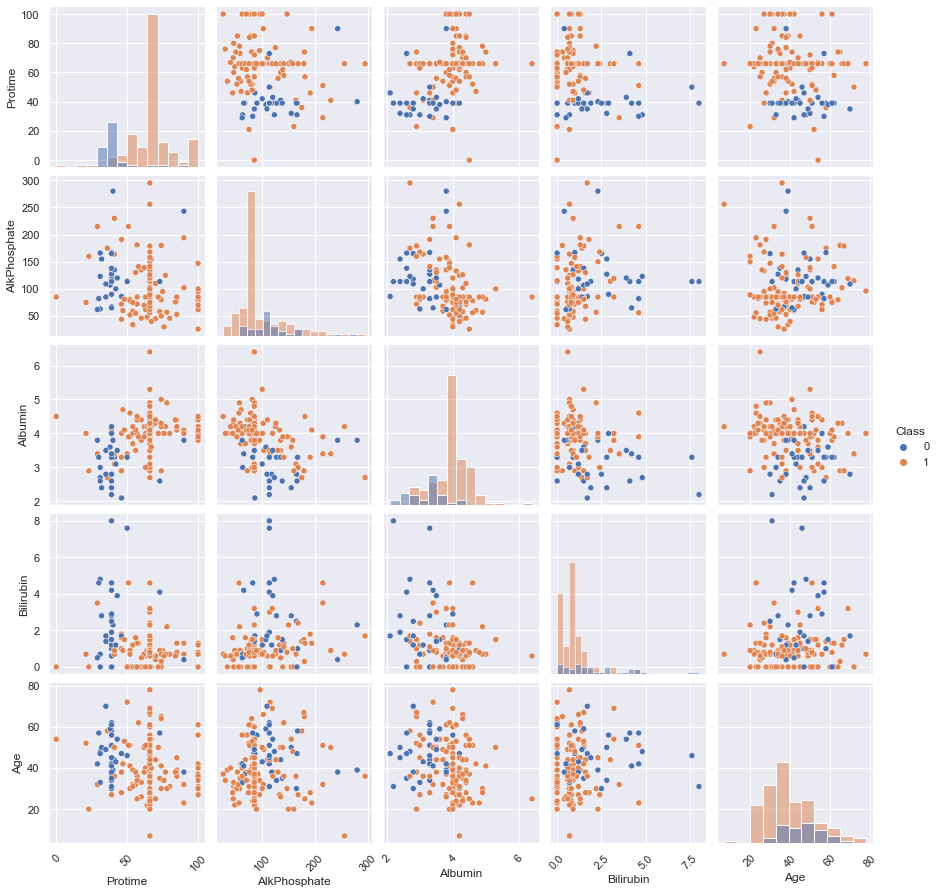

In [54]:
# Analisando a relação entre algumas variáveis
cols = ['Protime', 'AlkPhosphate', 'Albumin', 'Bilirubin', 'Age', 'Class']
g = sns.pairplot(dados_hepatite[cols], diag_kind = 'hist', hue = 'Class')
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation = 45)

In [55]:
# Não precisamos mais das colunas auxiliares, podemos removê-las
dados_hepatite.drop(['Sexo_Pessoa', 'Status_paciente', 'Idade'], axis = 1, inplace = True)

In [56]:
dados_hepatite.head()

,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
0,1,30,1,0.0,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,85.0,18.0,4.0,66.0,0
1,1,50,0,0.0,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.0,42.0,3.5,66.0,0
2,1,78,0,1.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.0,32.0,4.0,66.0,0
3,1,31,0,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.0,52.0,4.0,80.0,0
4,1,34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,85.0,200.0,4.0,66.0,0


###### Preparação dos Dados para Modelagem

In [57]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [58]:
# gerando X e Y dos dados que o professor tratou e que eu tratei para comparar os resultados
Xp = dados_hepatite.drop(['Class'], axis = 1)
Yp = dados_hepatite.Class

Xm = dados_tratados.drop(['Class'], axis = 1)
Ym = dados_tratados.Class

In [59]:
# Divisão em dados de treino e de teste
Xp_treino, Xp_teste, Yp_treino, Yp_teste = train_test_split(Xp, Yp, random_state = 23)
Xm_treino, Xm_teste, Ym_treino, Ym_teste = train_test_split(Xm, Ym, random_state = 23)

In [60]:
Xp_teste.dtypes

Age                 int64
Gender              int64
Steroid           float64
Antivirals          int64
Fatigue           float64
Malaise           float64
Anorexia          float64
LiverBig          float64
LiverFirm         float64
SpleenPalpable    float64
Spiders           float64
Ascites           float64
Varices           float64
Bilirubin         float64
AlkPhosphate      float64
SGOT              float64
Albumin           float64
Protime           float64
Histology           int64
dtype: object

In [61]:
Xm_teste.dtypes

Age                 int64
Gender              int64
Steroid             int64
Antivirals          int64
Fatigue             int64
Malaise             int64
Anorexia            int64
LiverBig            int64
LiverFirm           int64
SpleenPalpable      int64
Spiders             int64
Ascites             int64
Varices             int64
Histology           int64
Bilirubin         float64
AlkPhosphate      float64
SGOT              float64
Albumin           float64
Protime           float64
dtype: object

In [62]:
# Cria um classificar de Regressão Logistica
cls_vl = LogisticRegression(solver='liblinear')

In [63]:
# Treina o classificador e constrói o modelo
modelo_vp = cls_vl.fit(Xp_treino, Yp_treino)
modelo_vm = cls_vl.fit(Xm_treino, Ym_treino)

In [64]:
# Fazendo previsões com os dados de teste
yp_pred_class = modelo_vp.predict(Xp_teste)
ym_pred_class = modelo_vm.predict(Xm_teste)

In [65]:
# Calculando a acurácia 0.5
print(metrics.accuracy_score(Yp_teste, yp_pred_class))
print(metrics.accuracy_score(Ym_teste, ym_pred_class))

0.8205128205128205
0.8205128205128205


In [67]:
# Calculando a Confusion Matrix
confp = metrics.confusion_matrix(Yp_teste, yp_pred_class)
print(confp)

[[ 0  7]
 [ 0 32]]


In [68]:
confm = metrics.confusion_matrix(Ym_teste, ym_pred_class)
print(confm)

[[ 6  5]
 [ 2 26]]


<AxesSubplot:>

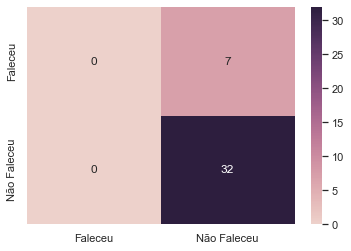

In [69]:
# Criando a Confusion Matrix de forma visual
cmap = sns.cubehelix_palette(as_cmap = True)
sns.heatmap(confp, cmap = cmap, xticklabels = ['Faleceu', 'Não Faleceu'], yticklabels = ['Faleceu', 'Não Faleceu'], annot = True)

<AxesSubplot:>

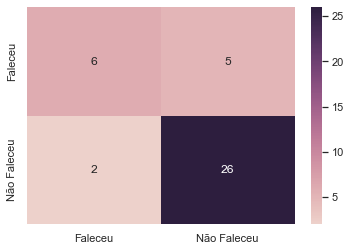

In [70]:
cmap = sns.cubehelix_palette(as_cmap = True)
sns.heatmap(confm, cmap = cmap, xticklabels = ['Faleceu', 'Não Faleceu'], yticklabels = ['Faleceu', 'Não Faleceu'], annot = True)

In [71]:
# Prevendo as probabilidades
predict_probabilitiesp = modelo_vp.predict_proba(Xp_teste)
predict_probabilitiesp

array([[1.00000000e+00, 6.06391886e-11],
       [1.00000000e+00, 8.93488840e-29],
       [1.00000000e+00, 6.58173935e-18],
       [1.00000000e+00, 4.01337651e-18],
       [1.00000000e+00, 1.67117746e-27],
       [1.00000000e+00, 2.82925421e-16],
       [1.00000000e+00, 3.01936893e-12],
       [1.00000000e+00, 1.11914234e-14],
       [1.00000000e+00, 1.49243486e-17],
       [1.00000000e+00, 6.13905832e-16],
       [1.00000000e+00, 2.80447287e-21],
       [1.00000000e+00, 1.93687954e-37],
       [1.00000000e+00, 3.00513323e-10],
       [1.00000000e+00, 5.46791882e-13],
       [1.00000000e+00, 8.05606547e-28],
       [1.00000000e+00, 1.04268536e-23],
       [9.99999983e-01, 1.73163122e-08],
       [9.99793092e-01, 2.06907600e-04],
       [1.00000000e+00, 3.01110952e-16],
       [1.00000000e+00, 1.72884443e-18],
       [1.00000000e+00, 7.52554391e-66],
       [1.00000000e+00, 7.56327225e-19],
       [9.99999998e-01, 2.35371502e-09],
       [1.00000000e+00, 1.34071287e-19],
       [1.000000

In [72]:
predict_probabilitiesm = modelo_vm.predict_proba(Xm_teste)
predict_probabilitiesm

array([[0.02566587, 0.97433413],
       [0.22510924, 0.77489076],
       [0.34963187, 0.65036813],
       [0.32821259, 0.67178741],
       [0.14230818, 0.85769182],
       [0.09179939, 0.90820061],
       [0.06334552, 0.93665448],
       [0.02886588, 0.97113412],
       [0.03406918, 0.96593082],
       [0.01812635, 0.98187365],
       [0.01205908, 0.98794092],
       [0.03258866, 0.96741134],
       [0.02508409, 0.97491591],
       [0.45101684, 0.54898316],
       [0.66068058, 0.33931942],
       [0.00588255, 0.99411745],
       [0.67882731, 0.32117269],
       [0.0512854 , 0.9487146 ],
       [0.16690157, 0.83309843],
       [0.3658524 , 0.6341476 ],
       [0.32842648, 0.67157352],
       [0.03525923, 0.96474077],
       [0.00901411, 0.99098589],
       [0.64072137, 0.35927863],
       [0.71919478, 0.28080522],
       [0.01482458, 0.98517542],
       [0.02551005, 0.97448995],
       [0.65017062, 0.34982938],
       [0.05509555, 0.94490445],
       [0.60637392, 0.39362608],
       [0.

In [73]:
yp_true = np.array(Yp_teste)
fprp, tprp, thresholdsp = roc_curve(yp_true, predict_probabilitiesp[:,1])

ym_true = np.array(Ym_teste)
fprm, tprm, thresholdsp = roc_curve(ym_true, predict_probabilitiesm[:,1], pos_label=2)

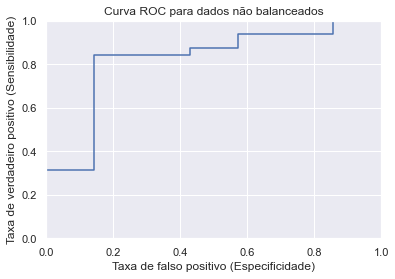

In [74]:
# Curva ROC
plt.plot(fprp, tprp)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Curva ROC para dados não balanceados')
plt.xlabel('Taxa de falso positivo (Especificidade)')
plt.ylabel('Taxa de verdadeiro positivo (Sensibilidade)')
plt.grid(True)

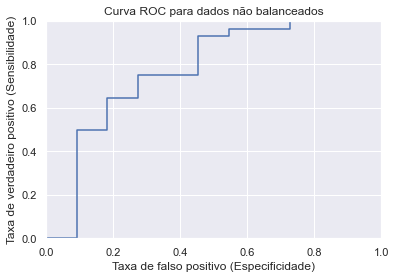

In [75]:
plt.plot(fprm, tprm)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Curva ROC para dados não balanceados')
plt.xlabel('Taxa de falso positivo (Especificidade)')
plt.ylabel('Taxa de verdadeiro positivo (Sensibilidade)')
plt.grid(True)

In [76]:
# Métrica AUC
roc_auc = metrics.auc(fprp, tprp)
print('Area Under The Roc Curve (AUC) do professor : %f' % roc_auc)

roc_auc = metrics.auc(fprm, tprm)
print('Area Under The Roc Curve (AUC) do meu : %f' % roc_auc)

Area Under The Roc Curve (AUC) do professor : 0.821429
Area Under The Roc Curve (AUC) do meu : 0.772727


In [77]:
# Treinando o modelo com dados balanceados
cls_v2 = LogisticRegression(class_weight = 'balanced', solver='liblinear')
modelo_vp2 = cls_v2.fit(Xp_treino, Yp_treino)
modelo_vm2 = cls_v2.fit(Xm_treino, Ym_treino)

In [78]:
# Previsões 
yp_pred_class = modelo_vp2.predict(Xp_teste)
ym_pred_class = modelo_vm2.predict(Xm_teste)

In [79]:
# Criando Confusion Matrix
confp = metrics.confusion_matrix(Yp_teste, yp_pred_class)
print(confp)

[[ 0  7]
 [ 0 32]]


In [81]:
confm = metrics.confusion_matrix(Ym_teste, ym_pred_class)
print(confm)

[[ 6  5]
 [ 7 21]]


<AxesSubplot:>

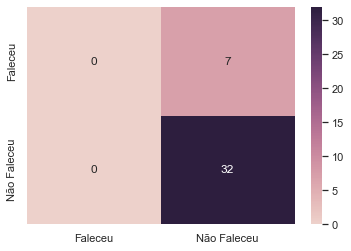

In [82]:
# Criando a Confusion Matrix de forma visual
cmap = sns.cubehelix_palette(as_cmap = True)
sns.heatmap(confp, cmap = cmap, xticklabels = ['Faleceu', 'Não Faleceu'], yticklabels = ['Faleceu', 'Não Faleceu'], annot = True)

<AxesSubplot:>

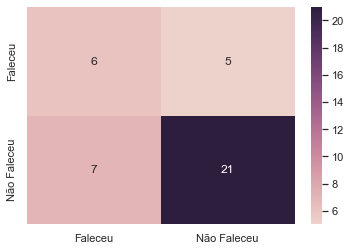

In [83]:
cmap = sns.cubehelix_palette(as_cmap = True)
sns.heatmap(confm, cmap = cmap, xticklabels = ['Faleceu', 'Não Faleceu'], yticklabels = ['Faleceu', 'Não Faleceu'], annot = True)

In [84]:
# Prevendo as probabilidades
predict_probabilitiesp = modelo_vp2.predict_proba(Xp_teste)
predict_probabilitiesp

array([[1.00000000e+00, 5.72312086e-19],
       [1.00000000e+00, 3.75736075e-33],
       [1.00000000e+00, 9.45014856e-24],
       [1.00000000e+00, 6.22612133e-24],
       [1.00000000e+00, 2.60231499e-34],
       [1.00000000e+00, 2.90269415e-22],
       [1.00000000e+00, 3.04238407e-17],
       [1.00000000e+00, 7.09783816e-20],
       [1.00000000e+00, 2.33052994e-23],
       [1.00000000e+00, 9.46391554e-22],
       [1.00000000e+00, 7.30224788e-29],
       [1.00000000e+00, 5.31502747e-44],
       [1.00000000e+00, 4.41360320e-17],
       [1.00000000e+00, 1.47435146e-18],
       [1.00000000e+00, 2.93885168e-32],
       [1.00000000e+00, 5.90281637e-30],
       [1.00000000e+00, 8.27317080e-15],
       [1.00000000e+00, 3.60229244e-10],
       [1.00000000e+00, 1.42482721e-24],
       [1.00000000e+00, 9.06058459e-25],
       [1.00000000e+00, 1.15112988e-71],
       [1.00000000e+00, 4.80163426e-24],
       [1.00000000e+00, 1.62820711e-14],
       [1.00000000e+00, 2.55847856e-24],
       [1.000000

In [85]:
# Prevendo as probabilidades
predict_probabilitiesm = modelo_vm2.predict_proba(Xm_teste)
predict_probabilitiesm

array([[0.06496596, 0.93503404],
       [0.4262489 , 0.5737511 ],
       [0.74446008, 0.25553992],
       [0.76535036, 0.23464964],
       [0.38204704, 0.61795296],
       [0.29259979, 0.70740021],
       [0.22271783, 0.77728217],
       [0.05746803, 0.94253197],
       [0.10064947, 0.89935053],
       [0.04293886, 0.95706114],
       [0.02492907, 0.97507093],
       [0.05413827, 0.94586173],
       [0.07306642, 0.92693358],
       [0.8725685 , 0.1274315 ],
       [0.9026478 , 0.0973522 ],
       [0.00919905, 0.99080095],
       [0.95754676, 0.04245324],
       [0.14778165, 0.85221835],
       [0.48303941, 0.51696059],
       [0.74313064, 0.25686936],
       [0.75692192, 0.24307808],
       [0.09357412, 0.90642588],
       [0.0162638 , 0.9837362 ],
       [0.91402289, 0.08597711],
       [0.93603711, 0.06396289],
       [0.03100119, 0.96899881],
       [0.05101763, 0.94898237],
       [0.905204  , 0.094796  ],
       [0.11492864, 0.88507136],
       [0.8536281 , 0.1463719 ],
       [0.

In [86]:
yp_true = np.array(Yp_teste)
fprp, tprp, thresholdsp = roc_curve(yp_true, predict_probabilitiesp[:,1])

ym_true = np.array(Ym_teste)
fprm, tprm, thresholdsp = roc_curve(ym_true, predict_probabilitiesm[:,1], pos_label=2)

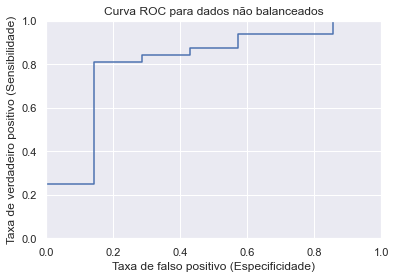

In [87]:
# Curva ROC
plt.plot(fprp, tprp)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Curva ROC para dados não balanceados')
plt.xlabel('Taxa de falso positivo (Especificidade)')
plt.ylabel('Taxa de verdadeiro positivo (Sensibilidade)')
plt.grid(True)

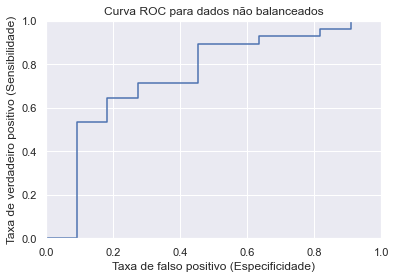

In [88]:
plt.plot(fprm, tprm)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Curva ROC para dados não balanceados')
plt.xlabel('Taxa de falso positivo (Especificidade)')
plt.ylabel('Taxa de verdadeiro positivo (Sensibilidade)')
plt.grid(True)

In [89]:
# Métrica AUC
roc_auc = metrics.auc(fprp, tprp)
print('Area Under The Roc Curve (AUC) do professor : %f' % roc_auc)

roc_auc = metrics.auc(fprm, tprm)
print('Area Under The Roc Curve (AUC) do meu : %f' % roc_auc)

Area Under The Roc Curve (AUC) do professor : 0.808036
Area Under The Roc Curve (AUC) do meu : 0.746753


###### Fazendo Previsões com Novos Dados

In [90]:
# Novos dados
novo_paciente = np.array([34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,62.0,214.0,4.2,100.0,0])

# Reshape do array
novo_paciente_reshape = novo_paciente.reshape(1, -1)

In [91]:
# Prevendo as probabilidades para cada classe no modelo do professor
modelo_vp2.predict_proba(novo_paciente_reshape)

array([[1.00000000e+00, 6.36434813e-19]])

In [92]:
# Prevendo a classe no modelo do professor
modelo_vp2.predict(novo_paciente_reshape)

array([1], dtype=int64)

In [93]:
# Novos dados trocando os 1 por 2 para equivaler os valores no meu modelo
novo_paciente = np.array([34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,62.0,214.0,4.2,100.0,1])

# Reshape do array
novo_paciente_reshape = novo_paciente.reshape(1, -1)

In [94]:
# Prevendo as probabilidades para cada classe no meu modelo
modelo_vm2.predict_proba(novo_paciente_reshape)

array([[1.00000000e+00, 1.06550591e-17]])

In [95]:
# Prevendo a classe no meu modelo
modelo_vm2.predict(novo_paciente_reshape)

array([1], dtype=int64)

Este paciente não deve vir a óbito por conta de hepatite